# Explorer Jesus
# Tratamiento de nulos y combinación de atributos que representan lo mismo.

In [170]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
data = pd.read_csv('/workspaces/Final_Project_DataScient/data/processed/data_prefinal.csv')
df = data.copy()
df

,MARITAL,RENTHOM1,VETERAN3,EMPLOY1,_AGEG5YR,_INCOMG1,_EDUCAG,_CHLDCNT,HHADULT,SEXVAR,...,_DRDXAR2,_PHYS14D,_MENT14D,_BMI5CAT,DECIDE,DIFFALON,LSATISFY,EMTSUPRT,SDHISOLT,tobacco_use
0,1.0,1.0,2.0,1.0,9.0,5.0,4.0,1.0,2.0,2.0,...,2.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0
1,1.0,1.0,2.0,7.0,9.0,9.0,4.0,1.0,4.0,2.0,...,2.0,1.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0
2,1.0,2.0,2.0,1.0,7.0,3.0,2.0,1.0,2.0,2.0,...,1.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,0.0,0.0
3,1.0,1.0,2.0,1.0,7.0,6.0,3.0,1.0,2.0,1.0,...,2.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,0.0,0.0
4,1.0,1.0,1.0,8.0,9.0,4.0,3.0,1.0,2.0,1.0,...,2.0,1.0,1.0,4.0,2.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115289,2.0,1.0,2.0,2.0,9.0,6.0,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,3.0,2.0,2.0,2.0,1.0,0.0,1.0
115290,1.0,2.0,2.0,1.0,10.0,6.0,4.0,1.0,4.0,1.0,...,1.0,1.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,0.0
115291,1.0,1.0,1.0,1.0,7.0,5.0,4.0,2.0,2.0,2.0,...,2.0,2.0,2.0,3.0,2.0,2.0,1.0,1.0,0.0,0.0
115292,1.0,3.0,2.0,8.0,10.0,9.0,2.0,1.0,1.0,2.0,...,2.0,3.0,3.0,1.0,7.0,2.0,9.0,0.0,1.0,2.0


### Definición de la variable objetivo

Definiremos ADDEPEV3 como nuestra variable objetivo. Esta variable indica si la persona encuestada ha sido diagnosticada alguna vez con depresión.

In [172]:
# Observamos los valores que contiene.
df['ADDEPEV3'].value_counts()

ADDEPEV3
0.0    91598
1.0    23696
Name: count, dtype: int64

### Matriz de Correlación

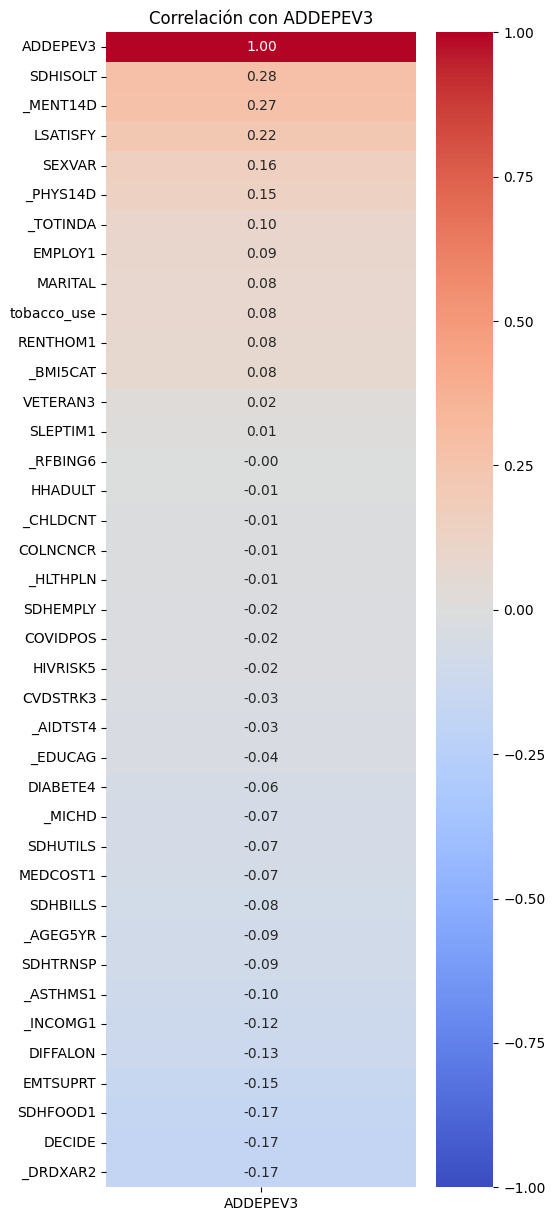

In [173]:
# Calculamos la matriz de correlación
cor_matrix = df.corr()

# Extraemos correlación con ADDEPEV3
cor_target = cor_matrix[["ADDEPEV3"]].sort_values(by="ADDEPEV3", ascending=False)

# Hacemos el heatmap
plt.figure(figsize=(5, 15))
sns.heatmap(cor_target, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlación con ADDEPEV3")
plt.show()

## Columnas a modificar por Jesus

In [174]:
df_jesus = df.iloc[:, :12]
df_jesus.columns

Index(['MARITAL', 'RENTHOM1', 'VETERAN3', 'EMPLOY1', '_AGEG5YR', '_INCOMG1',
       '_EDUCAG', '_CHLDCNT', 'HHADULT', 'SEXVAR', 'MEDCOST1', '_HLTHPLN'],
      dtype='object')

## Recodificación

### MARITAL
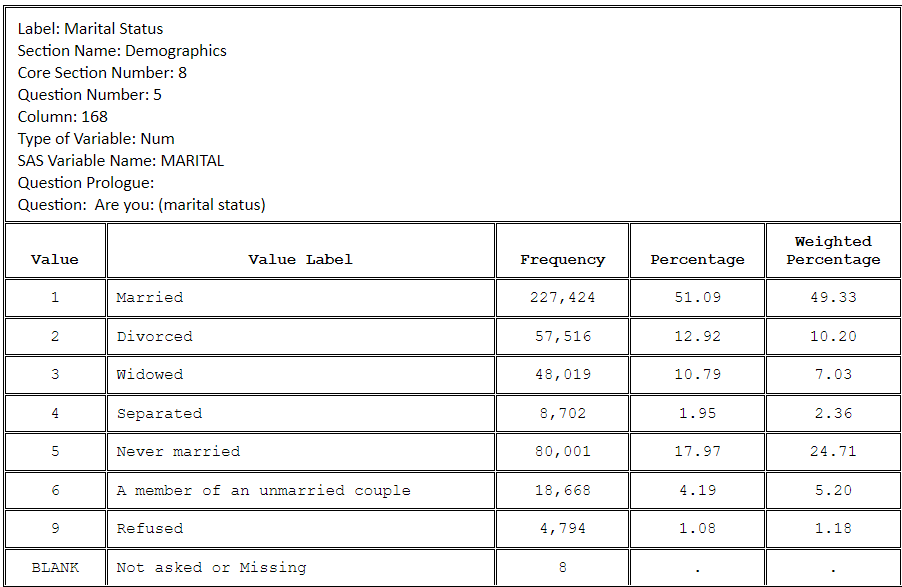
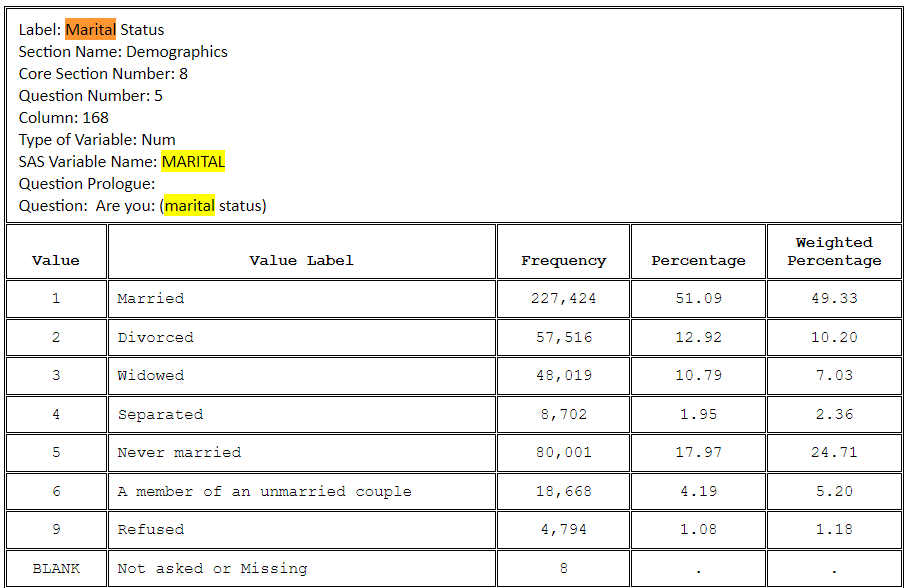

In [175]:
df['MARITAL'].value_counts()

MARITAL
1.0    68811
2.0    19495
3.0    11736
5.0     9124
6.0     3096
4.0     2404
9.0      628
Name: count, dtype: int64

In [176]:
df["MARITAL"] = df["MARITAL"] - 1 
df.loc[df["MARITAL"] == 8, "MARITAL"] = -1

df['MARITAL'].value_counts()

MARITAL
 0.0    68811
 1.0    19495
 2.0    11736
 4.0     9124
 5.0     3096
 3.0     2404
-1.0      628
Name: count, dtype: int64

### RENTHOM1
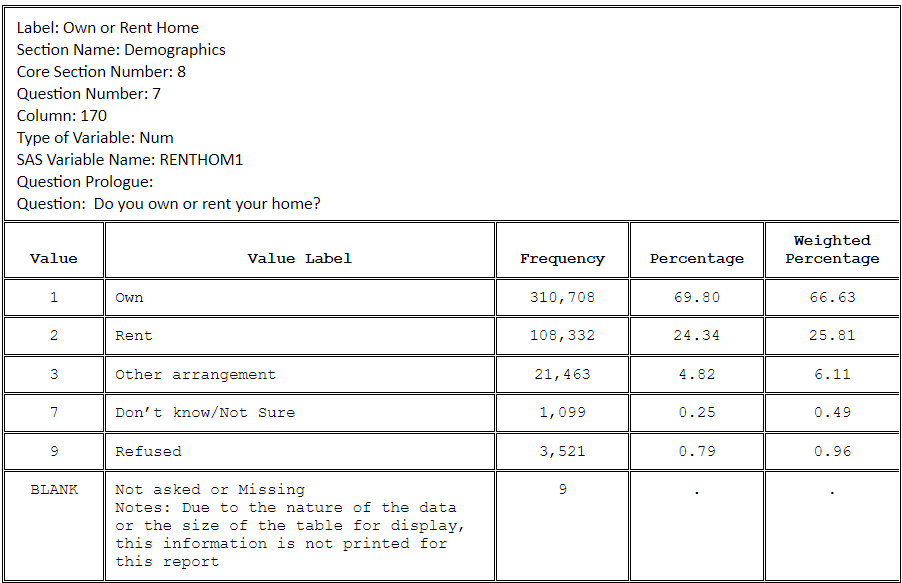

In [177]:
df['RENTHOM1'].value_counts()

RENTHOM1
1.0    91428
2.0    19934
3.0     3292
9.0      470
7.0      170
Name: count, dtype: int64

In [178]:
df["RENTHOM1"] = df["RENTHOM1"] - 1 
df.loc[df["RENTHOM1"] > 5, "RENTHOM1"] = -1


df['RENTHOM1'].value_counts()

RENTHOM1
 0.0    91428
 1.0    19934
 2.0     3292
-1.0      640
Name: count, dtype: int64

### VETERAN3
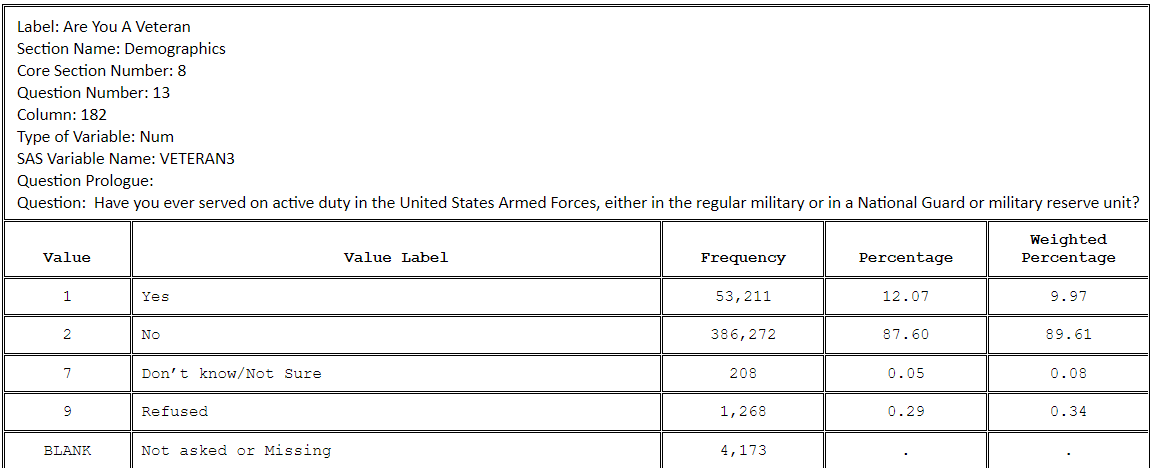

In [179]:
df['VETERAN3'].value_counts()

VETERAN3
2.0    98495
1.0    16629
9.0      132
7.0       38
Name: count, dtype: int64

In [180]:
df.loc[df["VETERAN3"] == 2, "VETERAN3"] = 0 
df.loc[df["VETERAN3"] > 3, "VETERAN3"] = -1

df['VETERAN3'].value_counts()


VETERAN3
 0.0    98495
 1.0    16629
-1.0      170
Name: count, dtype: int64

### EMPLOY1
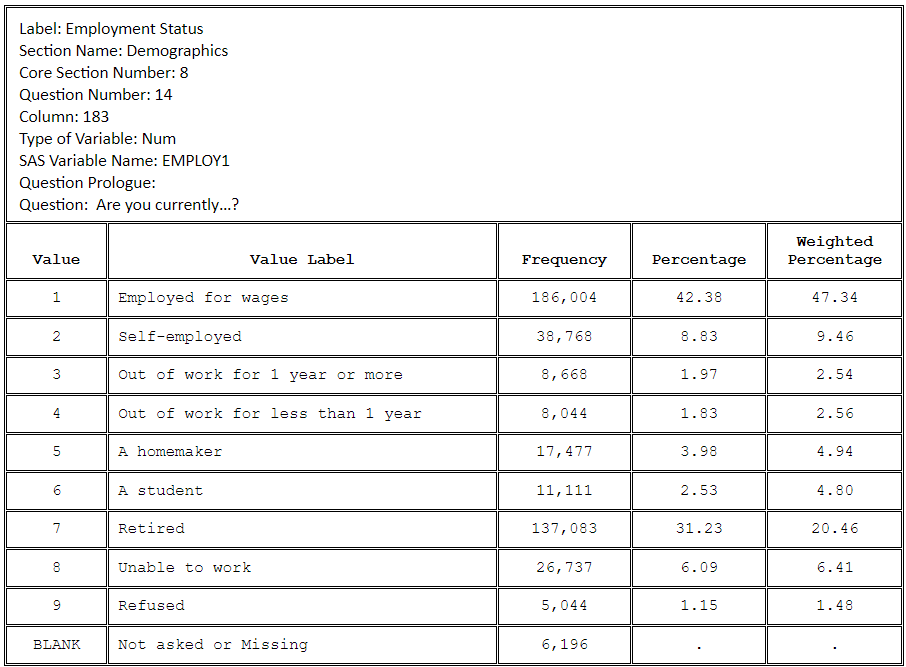

In [181]:
df['EMPLOY1'].value_counts()

EMPLOY1
1.0    44346
7.0    42308
2.0    11732
8.0     8875
5.0     3555
3.0     2100
4.0     1489
9.0      626
6.0      263
Name: count, dtype: int64

In [182]:
df["EMPLOY1"] = df["EMPLOY1"] - 1 
df.loc[df["EMPLOY1"] == 8, "EMPLOY1"] = -1

df['EMPLOY1'].value_counts()

EMPLOY1
 0.0    44346
 6.0    42308
 1.0    11732
 7.0     8875
 4.0     3555
 2.0     2100
 3.0     1489
-1.0      626
 5.0      263
Name: count, dtype: int64

### AGEG5YR
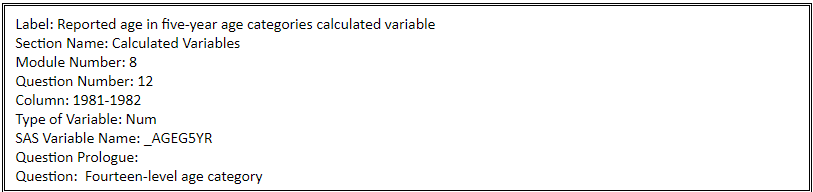
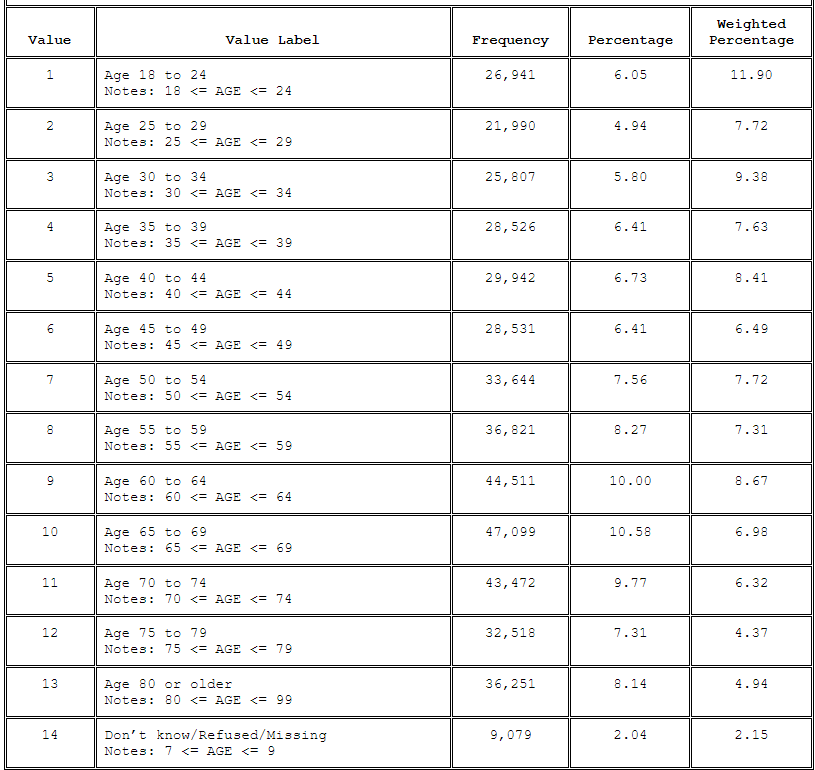

In [183]:
df['_AGEG5YR'].value_counts()

_AGEG5YR
9.0     18700
10.0    18062
8.0     16520
7.0     15656
11.0    14572
6.0     13700
12.0     9286
13.0     7015
14.0     1783
Name: count, dtype: int64

In [184]:
df["_AGEG5YR"] = df["_AGEG5YR"] - 1 
df.loc[df["_AGEG5YR"] ==  13, "_AGEG5YR"] = -1

df['_AGEG5YR'].value_counts()

_AGEG5YR
 8.0     18700
 9.0     18062
 7.0     16520
 6.0     15656
 10.0    14572
 5.0     13700
 11.0     9286
 12.0     7015
-1.0      1783
Name: count, dtype: int64

### _INCOMG1
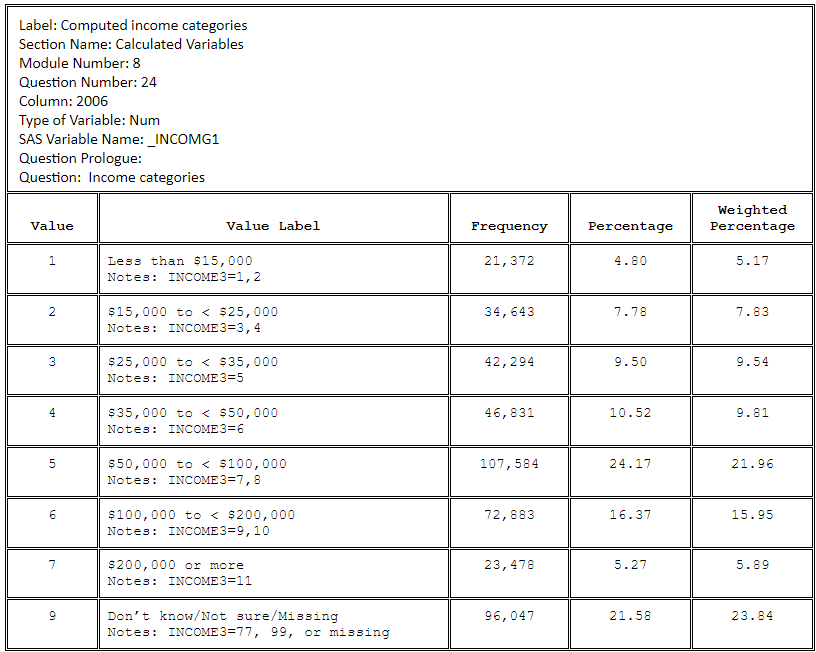

In [185]:
df['_INCOMG1'].value_counts()

_INCOMG1
5.0    30326
6.0    22309
9.0    17500
4.0    11803
3.0    10366
2.0     9029
7.0     7653
1.0     6308
Name: count, dtype: int64

In [186]:
df["_INCOMG1"] = df["_INCOMG1"] - 1 
df.loc[df["_INCOMG1"] >= 7, "_INCOMG1"] = -1

df['_INCOMG1'].value_counts()

_INCOMG1
 4.0    30326
 5.0    22309
-1.0    17500
 3.0    11803
 2.0    10366
 1.0     9029
 6.0     7653
 0.0     6308
Name: count, dtype: int64

### _EDUCAG
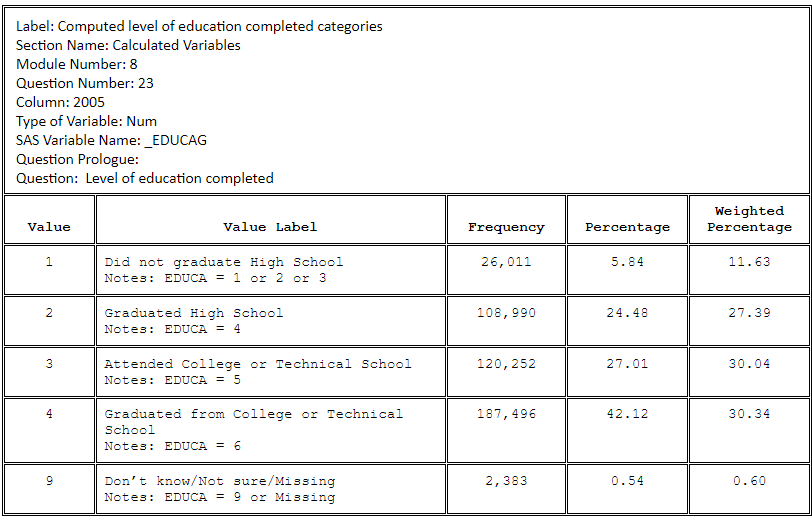

In [187]:
df['_EDUCAG'].value_counts()

_EDUCAG
4.0    51746
3.0    31719
2.0    24975
1.0     6541
9.0      313
Name: count, dtype: int64

In [188]:
df["_EDUCAG"] = df["_EDUCAG"] - 1 
df.loc[df["_EDUCAG"] > 5, "_EDUCAG"] = -1

df['_EDUCAG'].value_counts()

_EDUCAG
 3.0    51746
 2.0    31719
 1.0    24975
 0.0     6541
-1.0      313
Name: count, dtype: int64

### _CHLDCNT
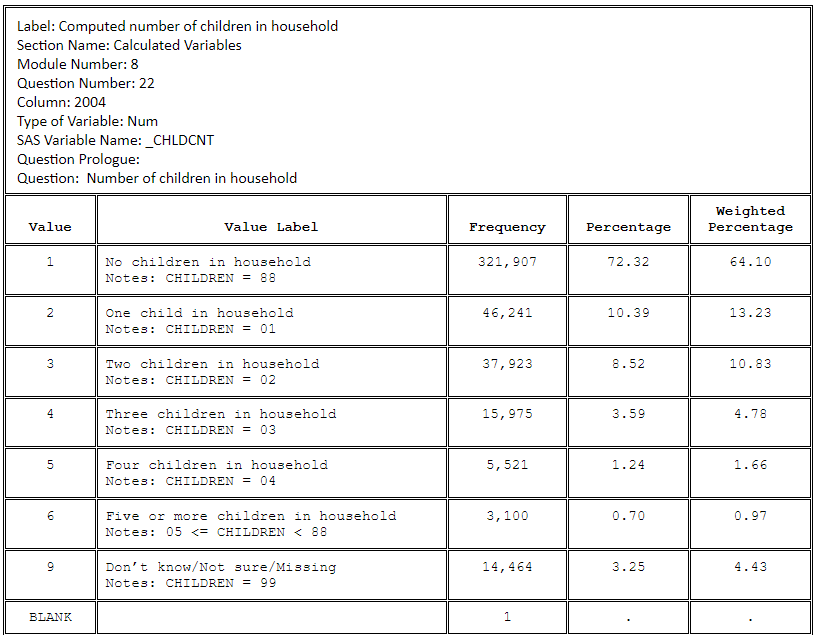

In [189]:
df['_CHLDCNT'].value_counts()

_CHLDCNT
1.0    94699
2.0    10578
3.0     6250
4.0     2003
9.0      829
5.0      599
6.0      336
Name: count, dtype: int64

In [190]:
df["_CHLDCNT"] = df["_CHLDCNT"] - 1 
df.loc[df["_CHLDCNT"] > 6, "_CHLDCNT"] = -1

df['_CHLDCNT'].value_counts()

_CHLDCNT
 0.0    94699
 1.0    10578
 2.0     6250
 3.0     2003
-1.0      829
 4.0      599
 5.0      336
Name: count, dtype: int64

### HHADULT
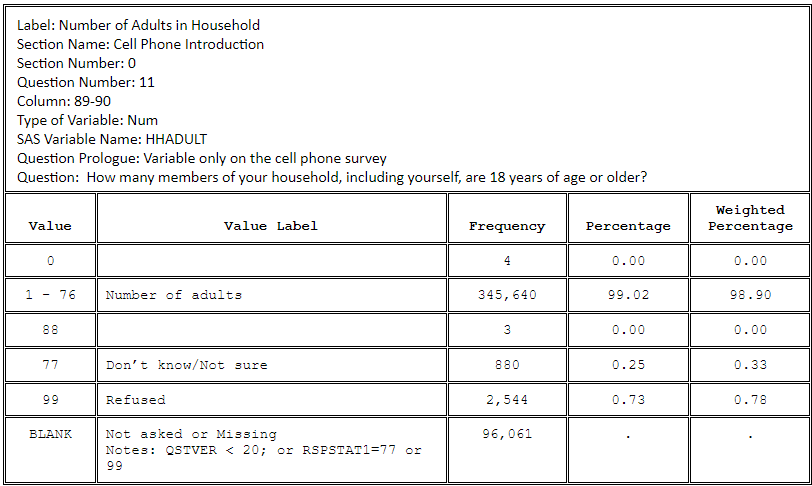

In [191]:
df['HHADULT'].value_counts()

HHADULT
2.000000e+00    58348
1.000000e+00    30667
3.000000e+00    16028
4.000000e+00     6617
5.000000e+00     1862
9.900000e+01      690
6.000000e+00      513
7.700000e+01      228
7.000000e+00      149
8.000000e+00       58
1.000000e+01       30
9.000000e+00       26
1.200000e+01       20
1.300000e+01       16
1.100000e+01       11
1.400000e+01        5
1.600000e+01        5
1.800000e+01        5
1.500000e+01        4
1.700000e+01        4
8.800000e+01        2
2.300000e+01        1
4.000000e+01        1
5.397605e-79        1
2.100000e+01        1
4.500000e+01        1
2.200000e+01        1
Name: count, dtype: int64

In [192]:
df['HHADULT'] = df['HHADULT'].astype(int)
print(df['HHADULT'].value_counts().sort_index())

HHADULT
0         1
1     30667
2     58348
3     16028
4      6617
5      1862
6       513
7       149
8        58
9        26
10       30
11       11
12       20
13       16
14        5
15        4
16        5
17        4
18        5
21        1
22        1
23        1
40        1
45        1
77      228
88        2
99      690
Name: count, dtype: int64


<Axes: xlabel='HHADULT', ylabel='Count'>

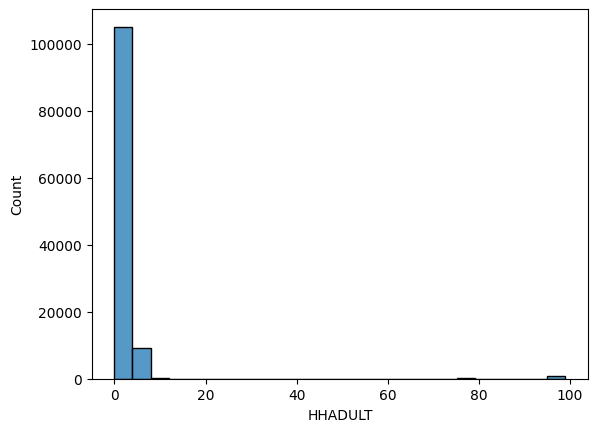

In [193]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data = df, x = "HHADULT",bins= 25)


<Axes: xlabel='HHADULT'>

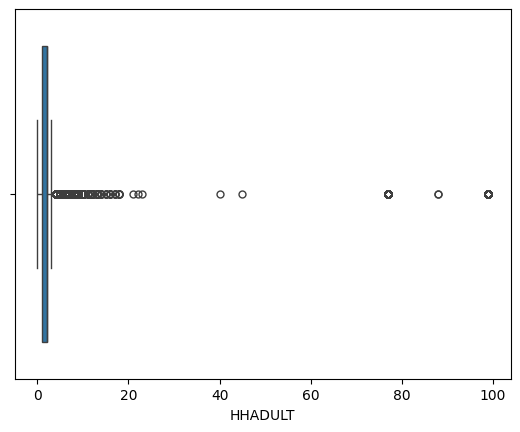

In [194]:
sns.boxplot(data = df, x = 'HHADULT',fliersize= 5)

In [195]:
#Se decide conservar estos casos por la posible presencia de personas que viven en refugios, 
# residencias de ancianos u otras situaciones especiales de vivienda.
df.loc[df["HHADULT"].isin([77,99]), "HHADULT"] = -1
df = df[df["HHADULT"] <= 20]

df['HHADULT'].value_counts()

HHADULT
 2     58348
 1     30667
 3     16028
 4      6617
 5      1862
-1       918
 6       513
 7       149
 8        58
 10       30
 9        26
 12       20
 13       16
 11       11
 14        5
 16        5
 18        5
 15        4
 17        4
 0         1
Name: count, dtype: int64

### SEXVAR
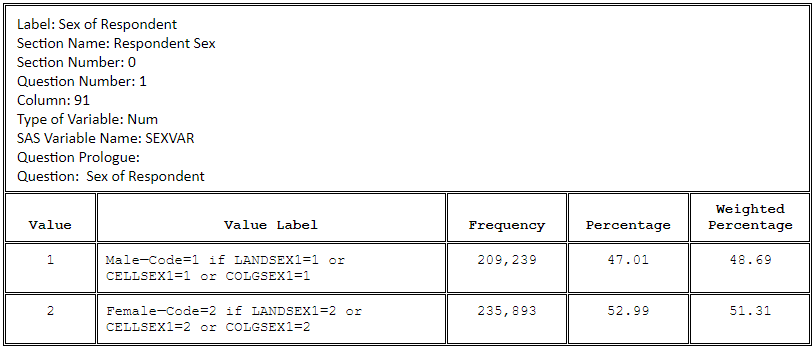

In [196]:
df['SEXVAR'].value_counts()

SEXVAR
1.0    58022
2.0    57265
Name: count, dtype: int64

In [197]:
df["SEXVAR"] = df["SEXVAR"] - 1
df['SEXVAR'].value_counts()

/tmp/ipykernel_5311/4134064350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SEXVAR"] = df["SEXVAR"] - 1


SEXVAR
0.0    58022
1.0    57265
Name: count, dtype: int64

### MEDCOST1
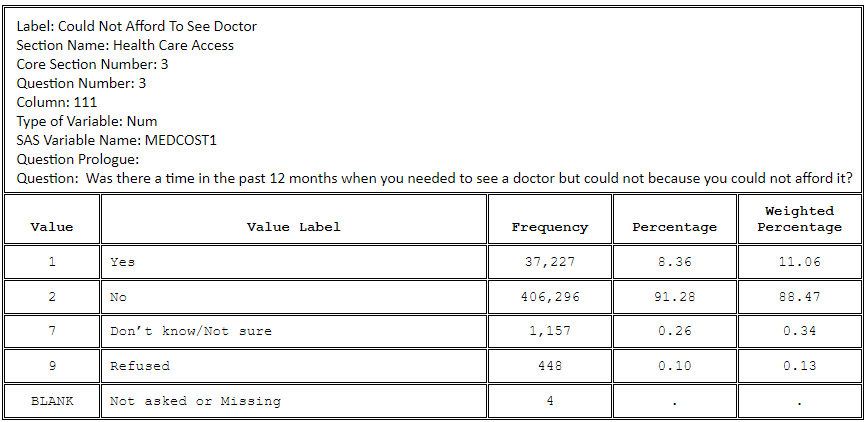

<!-- ### MEDCOST1 -->

In [168]:
df['MEDCOST1'].value_counts()

MEDCOST1
2.0    107130
1.0      7856
7.0       235
9.0        66
Name: count, dtype: int64

In [198]:
# Se pasa el 2 a 0, Ya que no cumple la condición.

df.loc[df["MEDCOST1"] > 6, "MEDCOST1"] = -1
df.loc[df["MEDCOST1"] == 2, "MEDCOST1"] = 0

df['MEDCOST1'].value_counts()

MEDCOST1
 0.0    107130
 1.0      7856
-1.0       301
Name: count, dtype: int64

### _HLTHPLN
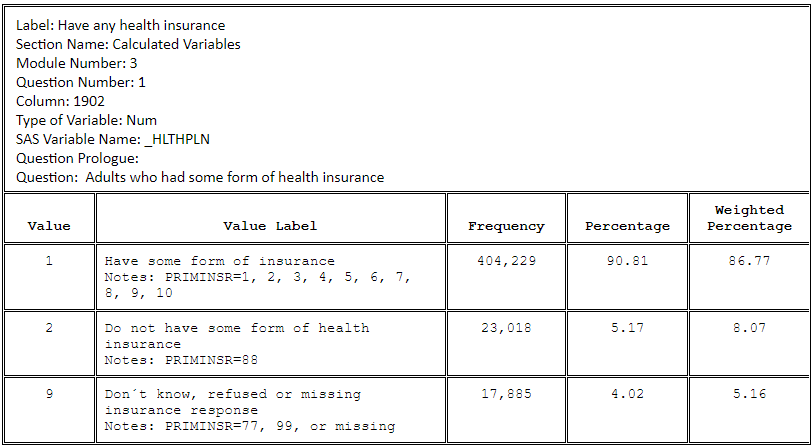

In [199]:
df['_HLTHPLN'].value_counts()

_HLTHPLN
1.0    108174
2.0      4273
9.0      2840
Name: count, dtype: int64

In [200]:
# Se pasa el 2 a 0, Ya que no cumple la condición.

df.loc[df["_HLTHPLN"] > 6, "_HLTHPLN"] = -1
df.loc[df["_HLTHPLN"] == 2, "_HLTHPLN"] = 0

df['_HLTHPLN'].value_counts()

_HLTHPLN
 1.0    108174
 0.0      4273
-1.0      2840
Name: count, dtype: int64